In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

# Display the first few rows of the dataset
print(data.head())



  Jurisdiction of Occurrence  Year  Month  All Cause  Natural Cause  \
0              United States  2014      1     243298         226621   
1              United States  2015      1     265355         247269   
2              United States  2016      1     245823         227341   
3              United States  2017      1     262832         241918   
4              United States  2018      1     286744         265418   

   Septicemia  Malignant Neoplasms  Diabetes Mellitus  Alzheimer Disease  \
0        3944                51101               7344               8305   
1        4194                52346               8053              11638   
2        3846                51863               7392              10612   
3        4089                52120               7907              12018   
4        4502                52876               8674              13410   

   Influenza and Pneumonia  ...  Other Diseases of Respiratory System  \
0                     7929  ...            

In [20]:
# Display the data types and non-null counts to check for any immediate cleaning needs
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Jurisdiction of Occurrence                                                                72 non-null     object
 1   Year                                                                                      72 non-null     int64 
 2   Month                                                                                     72 non-null     int64 
 3   All Cause                                                                                 72 non-null     int64 
 4   Natural Cause                                                                             72 non-null     int64 
 5   Septicemia                                                        

In [21]:
# Check for missing values in the dataset
print(data.isnull().sum())

Jurisdiction of Occurrence                                                                  0
Year                                                                                        0
Month                                                                                       0
All Cause                                                                                   0
Natural Cause                                                                               0
Septicemia                                                                                  0
Malignant Neoplasms                                                                         0
Diabetes Mellitus                                                                           0
Alzheimer Disease                                                                           0
Influenza and Pneumonia                                                                     0
Chronic Lower Respiratory Diseases                          

In [22]:
#summary of the numerical columns
print(data.describe())

             Year      Month      All Cause  Natural Cause   Septicemia  \
count    72.00000  72.000000      72.000000      72.000000    72.000000   
mean   2016.50000   6.500000  230428.361111  211008.333333  3338.847222   
std       1.71981   3.476278   15602.341422   15118.931548   328.925466   
min    2014.00000   1.000000  204687.000000  187644.000000  2886.000000   
25%    2015.00000   3.750000  219880.250000  199788.500000  3120.250000   
50%    2016.50000   6.500000  227895.000000  208178.500000  3248.000000   
75%    2018.00000   9.250000  237163.750000  216745.250000  3527.500000   
max    2019.00000  12.000000  286744.000000  265418.000000  4502.000000   

       Malignant Neoplasms  Diabetes Mellitus  Alzheimer Disease  \
count            72.000000          72.000000          72.000000   
mean          49772.930556        6836.638889        9515.652778   
std            1543.032804         611.213600        1267.264717   
min           45558.000000        5802.000000       

In [23]:
#column names to check the actual names in the dataset
print(data.columns)

Index(['Jurisdiction of Occurrence', 'Year', 'Month', 'All Cause',
       'Natural Cause', 'Septicemia', 'Malignant Neoplasms',
       'Diabetes Mellitus', 'Alzheimer Disease', 'Influenza and Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System',
       'Nephritis, Nephrotic Syndrome, and Nephrosis',
       'Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',
       'Diseases of Heart', 'Cerebrovascular Diseases',
       'Accidents (Unintentional Injuries)', 'Motor Vehicle Accidents',
       'Intentional Self-Harm (Suicide)', 'Assault (Homicide)',
       'Drug Overdose'],
      dtype='object')


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set_style("whitegrid")

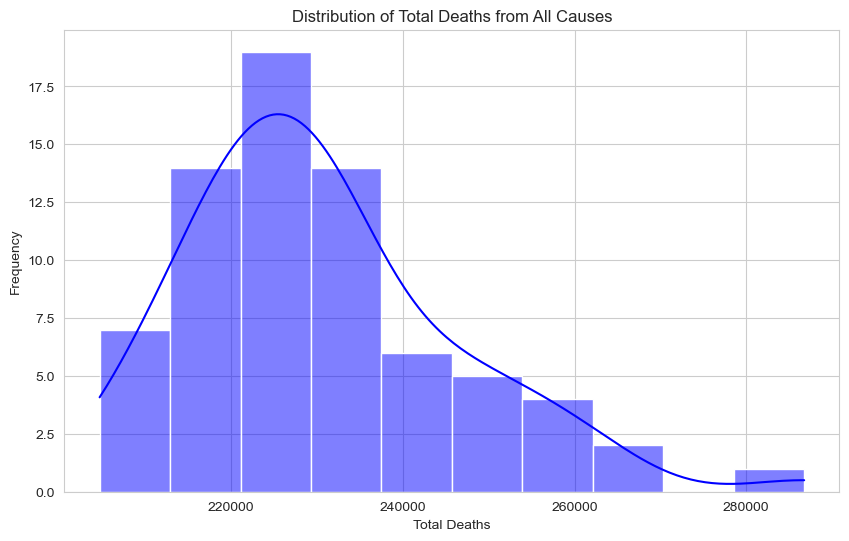

In [26]:
# Plotting the distribution of total deaths for 'All Cause' to see the general trend
plt.figure(figsize=(10, 6))
sns.histplot(data['All Cause'], kde=True, color='blue')
plt.title('Distribution of Total Deaths from All Causes')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.show()

### The histogram shows the distribution of total deaths, helping identify skewness or outliers. The line plot displays monthly trends, revealing any seasonal patterns or anomalies.

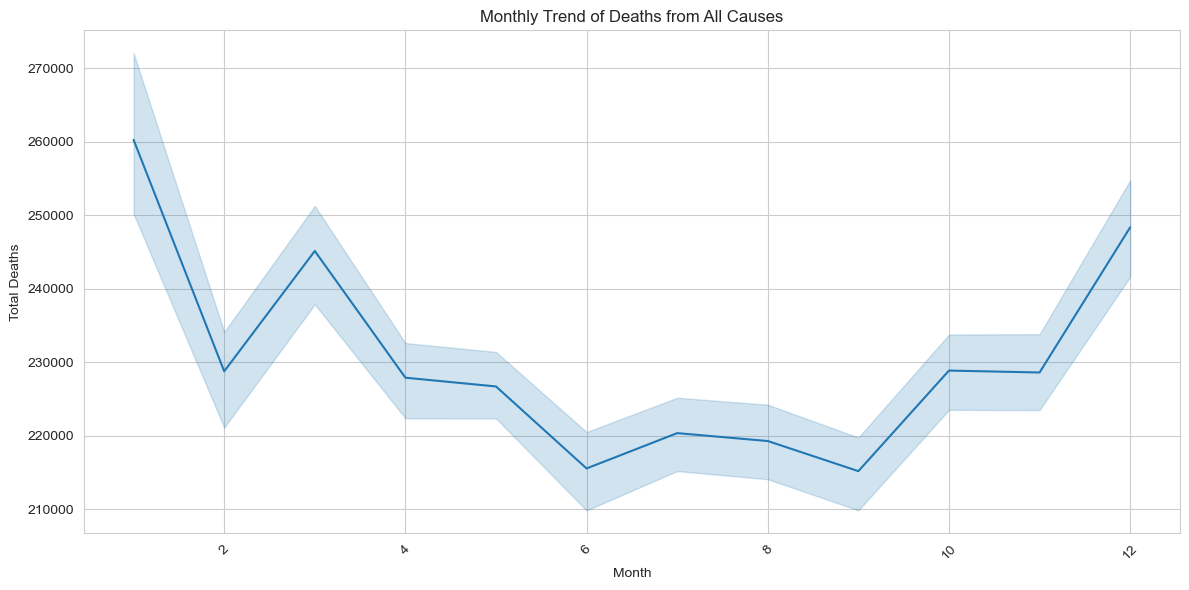

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Month', y='All Cause')
plt.title('Monthly Trend of Deaths from All Causes')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
#sum of each cause of death column
total_deaths_by_cause = data[[col for col in data.columns if 'Cause' in col]].sum()

#sums to see the total deaths for each cause
print(total_deaths_by_cause)


All Cause        16590842
Natural Cause    15192600
dtype: int64


In [30]:
# Sort the total deaths to find the top causes
top_causes = total_deaths_by_cause.sort_values(ascending=False)
print("Top Causes of Death:")
print(top_causes.head(5))


Top Causes of Death:
All Cause        16590842
Natural Cause    15192600
dtype: int64


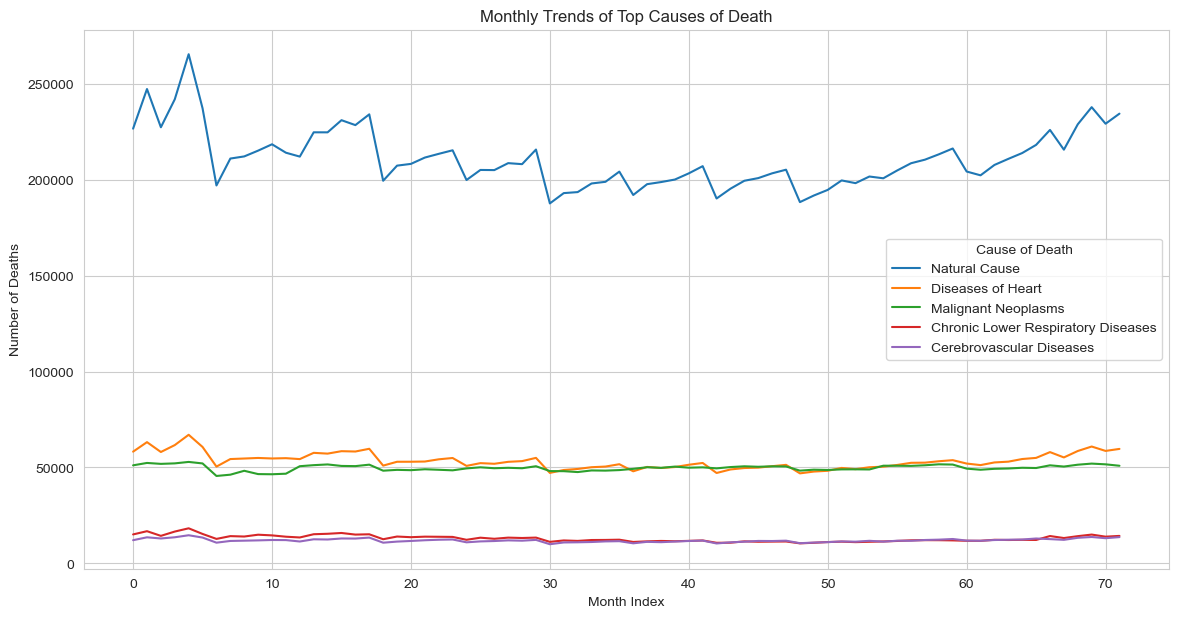

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot trends for the top 5 causes of death
plt.figure(figsize=(14, 7))
for cause in top_causes.head(5).index:
    sns.lineplot(x=data.index, y=data[cause], label=cause)

plt.title('Monthly Trends of Top Causes of Death')
plt.xlabel('Month Index')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death')
plt.show()


Top Causes of Death (2014-2019):
Natural Cause                         15192600
Diseases of Heart                      3845329
Malignant Neoplasms                    3583651
Chronic Lower Respiratory Diseases      933404
Cerebrovascular Diseases                859766
dtype: int64


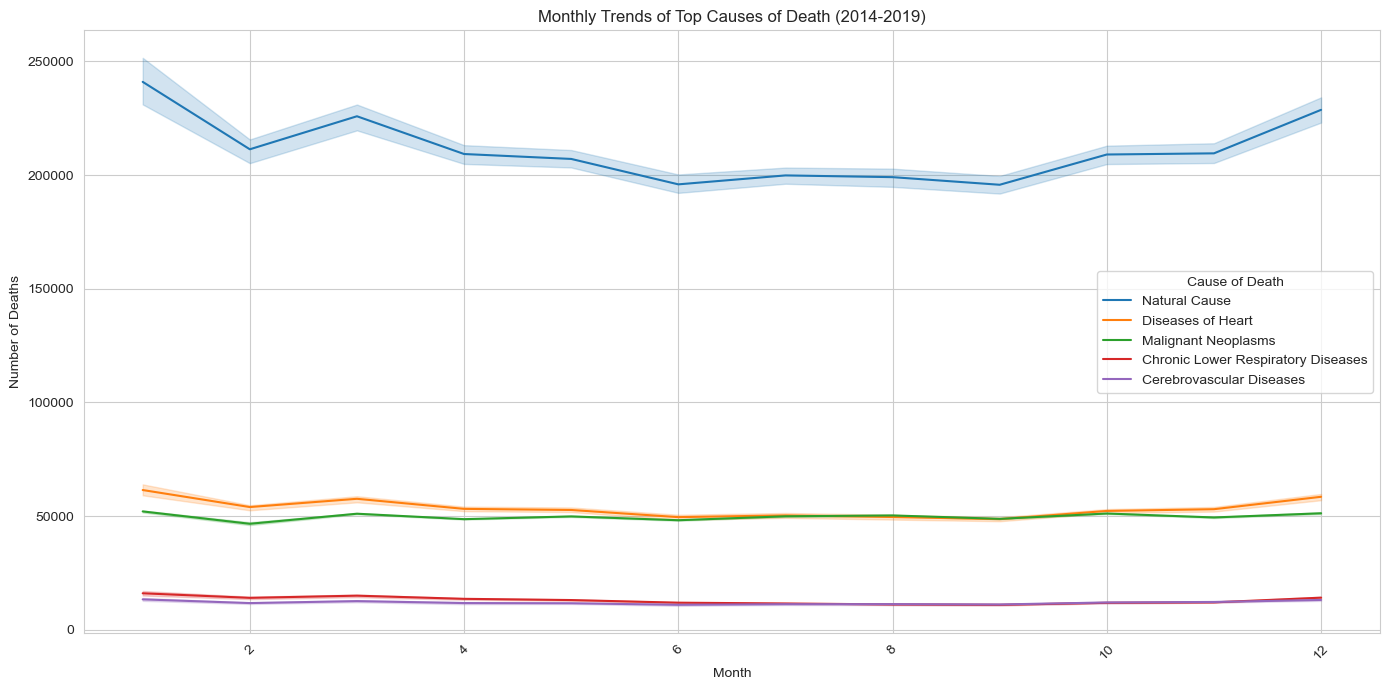

In [33]:
# Sum the death counts for each cause over the entire period to identify the top causes
top_causes = data[['Natural Cause', 'Malignant Neoplasms', 'Diseases of Heart', 'Chronic Lower Respiratory Diseases', 'Cerebrovascular Diseases']].sum().sort_values(ascending=False)

print("Top Causes of Death (2014-2019):")
print(top_causes)

# Plotting trends of the top causes of death
plt.figure(figsize=(14, 7))
for cause in top_causes.index:
    sns.lineplot(data=data, x='Month', y=cause, label=cause)

plt.title('Monthly Trends of Top Causes of Death (2014-2019)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.legend(title='Cause of Death')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


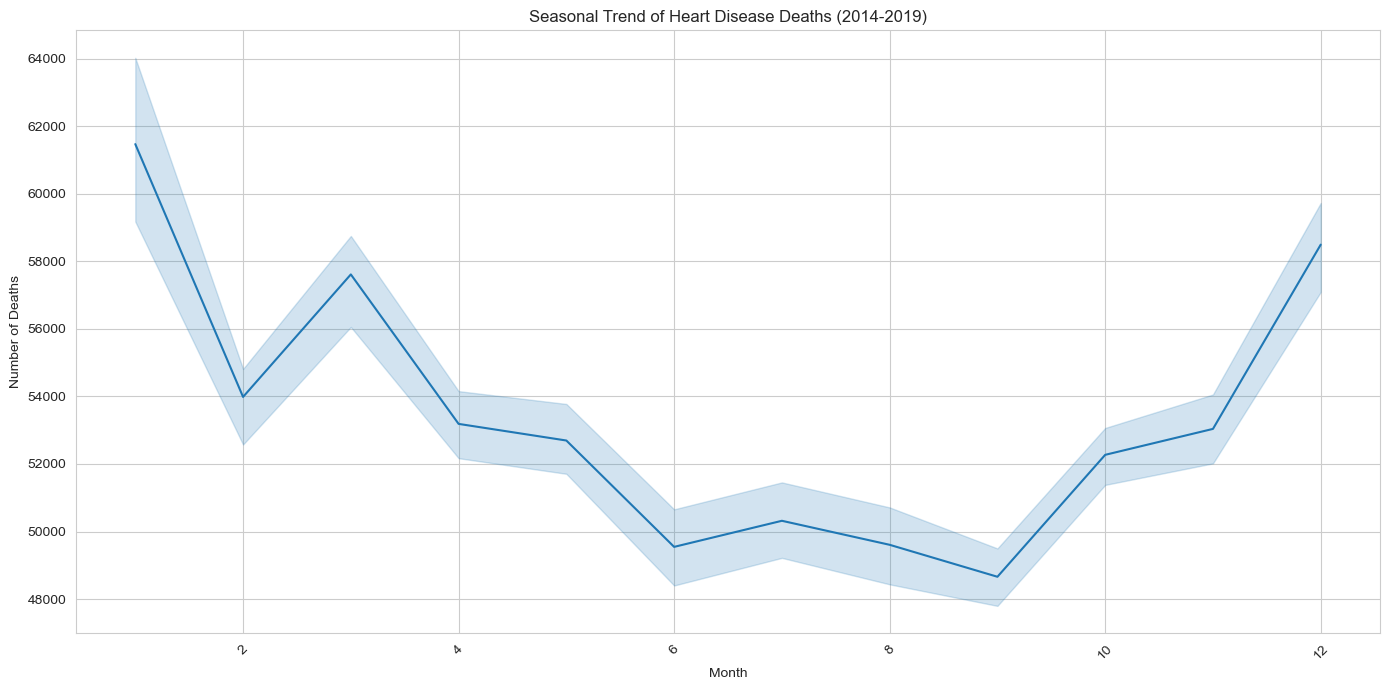

In [34]:
# Using 'Diseases of Heart' as an example for seasonal analysis
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Month', y='Diseases of Heart')
plt.title('Seasonal Trend of Heart Disease Deaths (2014-2019)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


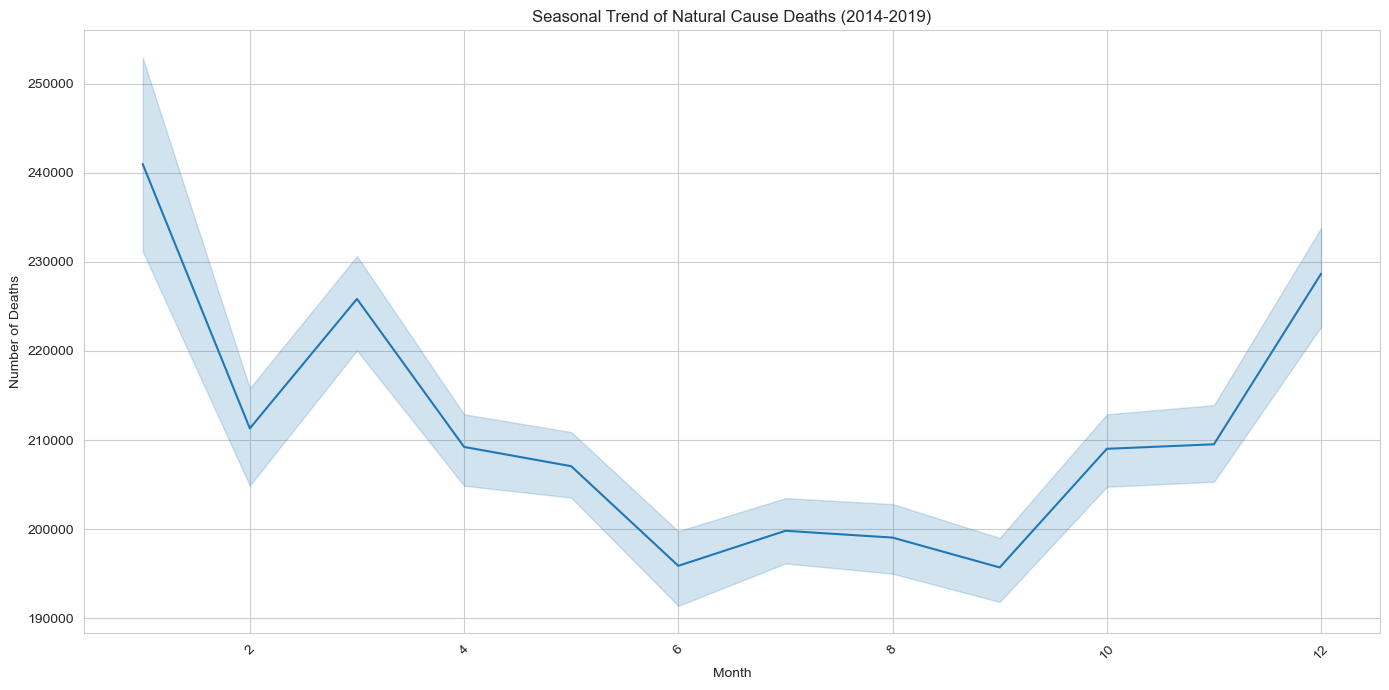

In [35]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Month', y='Natural Cause')
plt.title('Seasonal Trend of Natural Cause Deaths (2014-2019)')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


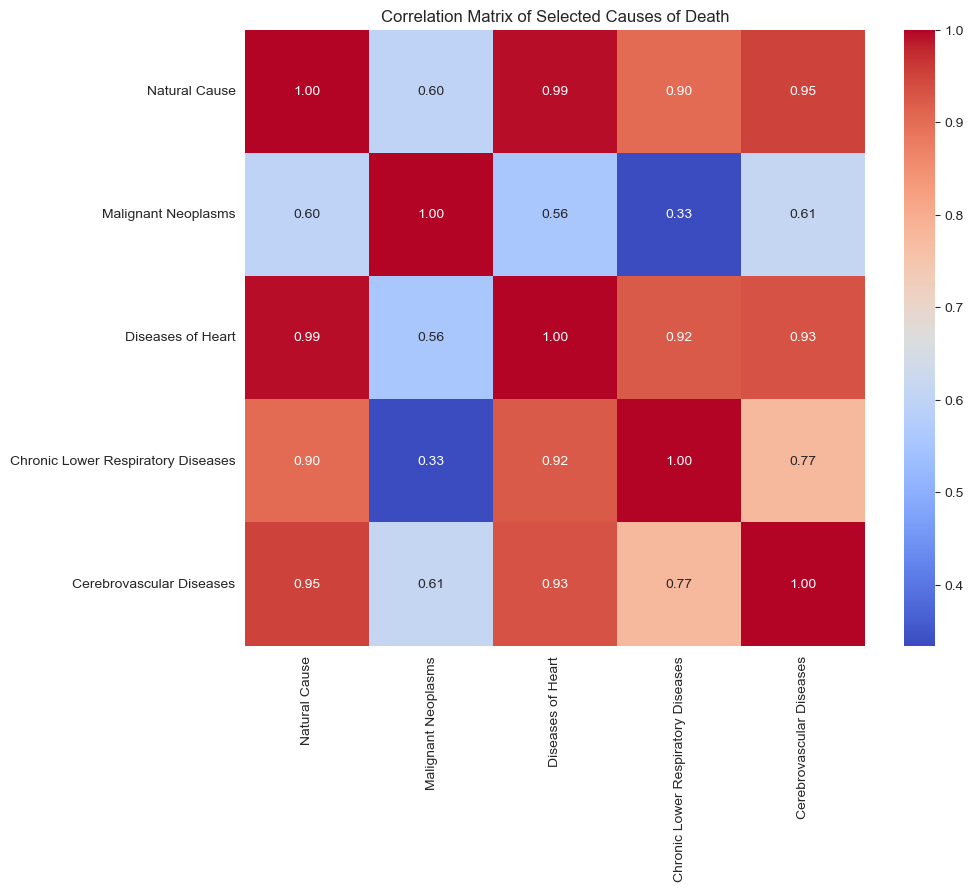

In [36]:
# Selecting a subset of causes for correlation analysis
causes_subset = data[['Natural Cause', 'Malignant Neoplasms', 'Diseases of Heart', 'Chronic Lower Respiratory Diseases', 'Cerebrovascular Diseases']]
correlation_matrix = causes_subset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Causes of Death')
plt.show()

Interpreting results: 

- High Positive Correlation (close to 1): If two causes of death, say 'Diseases of Heart' and 'Cerebrovascular Diseases', show a high positive correlation, it suggests that regions or times with high numbers of deaths from heart diseases also see high numbers of deaths from cerebrovascular diseases. This might indicate shared risk factors such as age demographics, lifestyle factors, or healthcare access quality.

- High Negative Correlation (close to -1): If two causes of death show a high negative correlation, although less common in this type of data, it would imply that an increase in deaths from one cause could be associated with a decrease in deaths from another. This is rare in mortality data but could occur in scenarios where preventive measures against one cause inadvertently protect against another.

- Low or No Correlation (close to 0): This indicates that the occurrences of deaths from two causes do not show any strong linear relationship. They may occur independently of each other, influenced by different factors, or their relationship might be nonlinear, which the correlation coefficient does not capture.

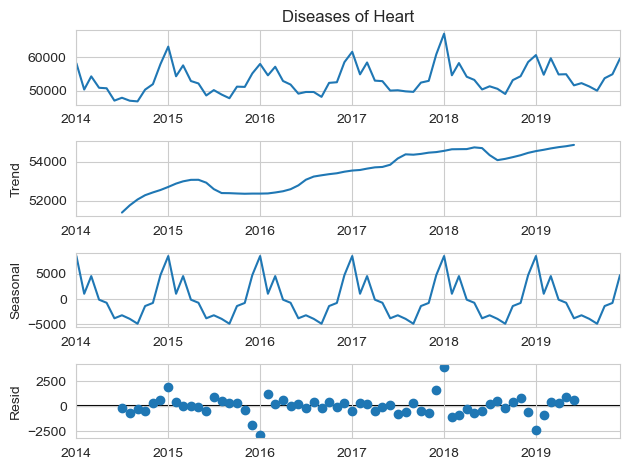

In [38]:
import statsmodels.api as sm

# focusing on a single cause, e.g., 'Diseases of Heart'
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))
heart_disease_data = data.sort_values('Date').set_index('Date')['Diseases of Heart']

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(heart_disease_data, model='additive', period=12)
fig = decomposition.plot()
plt.show()


The purpose of the cell above is to decompose the time series data into its seasonal, trend, and residual components to understand underlying patterns better.

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model for 'Diseases of Heart'
model = ARIMA(heart_disease_data, order=(1,1,1)) # The order (p,d,q) needs to be adjusted based on the data
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)


2020-01-01    58902.730231
2020-02-01    59276.070064
2020-03-01    59092.736941
2020-04-01    59182.764929
2020-05-01    59138.555577
2020-06-01    59160.265124
2020-07-01    59149.604384
2020-08-01    59154.839471
2020-09-01    59152.268717
2020-10-01    59153.531118
2020-11-01    59152.911200
2020-12-01    59153.215618
Freq: MS, Name: predicted_mean, dtype: float64


/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Results Overview:

### Coefficients:
- AR(1): The coefficient is negative, suggesting a slight negative autocorrelation with the previous value.
- MA(1): The coefficient here is positive, indicating that the model uses the error of the previous prediction to correct the current one.
- AIC: A lower AIC indicates a model's better fit to the data while penalizing excessive complexity.

### Statistical Significance:

P-values for the coefficients indicate whether these relationships are statistically significant. Typically, a p-value less than 0.05 would suggest a significant contribution of the coefficient to the model.

### Implications:

The model suggests that past values and the errors from past forecasts are influential in predicting future heart disease death rates.

The predictive model can inform healthcare providers about potential increases or decreases in heart disease-related deaths, aiding in resource planning and preventive measures.

ADF Statistic: -1.178399
p-value: 0.682818


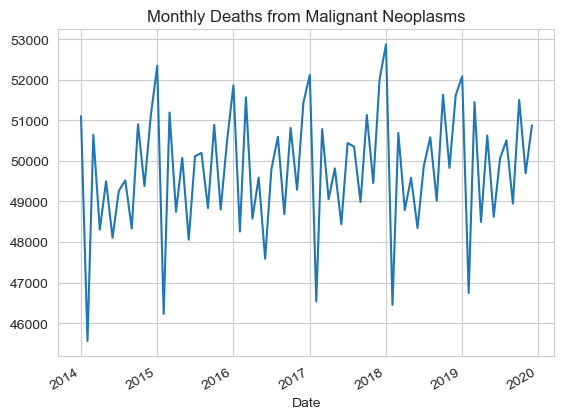

In [43]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))
data.set_index('Date', inplace=True)

# Select the time series for "Malignant Neoplasms"
cancer_deaths = data['Malignant Neoplasms']

# Check for stationarity
result = adfuller(cancer_deaths.dropna())  # dropna() is used to remove any missing values
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot the data
cancer_deaths.plot(title='Monthly Deaths from Malignant Neoplasms')
plt.show()

/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecas

                                SARIMAX Results                                
Dep. Variable:     Malignant Neoplasms   No. Observations:                   72
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -606.866
Date:                 Sun, 12 May 2024   AIC                           1219.732
Time:                         01:10:15   BIC                           1226.520
Sample:                              0   HQIC                          1222.431
                                  - 72                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7349      0.474     -1.550      0.121      -1.664       0.194
ma.L1          0.7692      0.396      1.944      0.052      -0.006       1.545
sigma2       1.62e+06   1.99e+05      8.155 

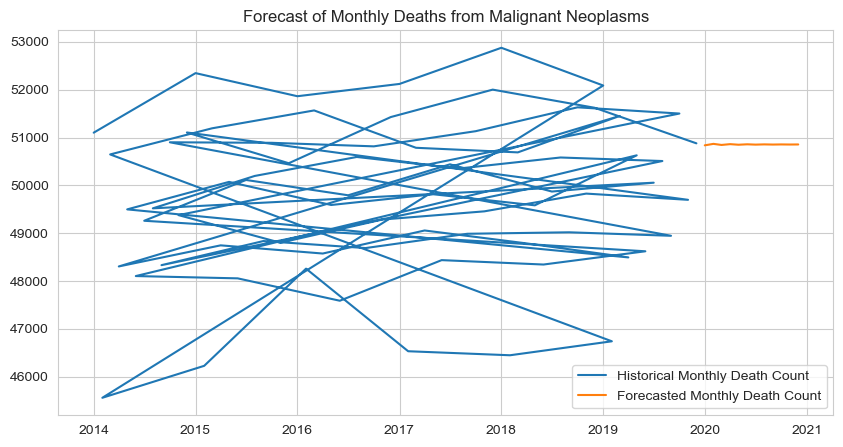

In [44]:
# Assuming the data is stationary or after you've differenced it if needed
# Fit an ARIMA model
model = ARIMA(cancer_deaths, order=(1,1,1))  # You may need to adjust the order based on ACF and PACF plots
model_fit = model.fit()

# Print out the summary of the model's performance
print(model_fit.summary())

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10,5))
plt.plot(cancer_deaths.index, cancer_deaths, label='Historical Monthly Death Count')
plt.plot(pd.date_range(cancer_deaths.index[-1], periods=12, freq='M'), forecast, label='Forecasted Monthly Death Count')
plt.title('Forecast of Monthly Deaths from Malignant Neoplasms')
plt.legend()
plt.show()


### Results Overview:

### Coefficients:
- Both AR(1) and MA(1) coefficients are close to their bounds (-1 and 1 respectively), which may indicate a strong but smooth pattern in the data over time.AIC: Observing the AIC value relative to other models would help assess its comparative goodness of fit.

### Statistical Significance:

- The p-values will confirm if the observed patterns are reliable and not due to random fluctuations in the data.

### Implications:

This model predicts the cancer mortality trend, which is crucial for understanding whether interventions or changes in public health policy are having the desired effect on cancer mortality rates.
Significant predictors in the model highlight key dynamics in how cancer deaths evolve over time, potentially pointing to external factors influencing these trends.

ADF Statistic: -1.412512
p-value: 0.576263


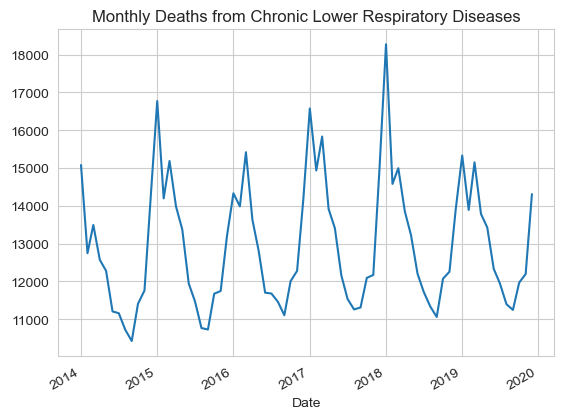

In [45]:
respiratory_deaths = data['Chronic Lower Respiratory Diseases']

# Check for stationarity
result = adfuller(respiratory_deaths.dropna())  # Ensure there are no NaN values
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot the data
respiratory_deaths.plot(title='Monthly Deaths from Chronic Lower Respiratory Diseases')
plt.show()

Differenced data ADF Statistic: 0.170373
Differenced data p-value: 0.970550


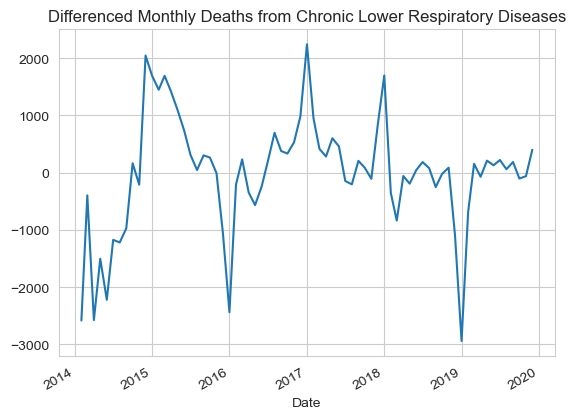

In [46]:
# Difference the data if not stationary
respiratory_diff = respiratory_deaths.diff().dropna()

# Re-check for stationarity
result_diff = adfuller(respiratory_diff)
print('Differenced data ADF Statistic: %f' % result_diff[0])
print('Differenced data p-value: %f' % result_diff[1])

# Plot differenced data
respiratory_diff.plot(title='Differenced Monthly Deaths from Chronic Lower Respiratory Diseases')
plt.show()

/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecas

                                       SARIMAX Results                                        
Dep. Variable:     Chronic Lower Respiratory Diseases   No. Observations:                   72
Model:                                 ARIMA(1, 1, 1)   Log Likelihood                -589.531
Date:                                Sun, 12 May 2024   AIC                           1185.062
Time:                                        01:12:39   BIC                           1191.850
Sample:                                             0   HQIC                          1187.762
                                                 - 72                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8347      0.053     15.799      0.000       0.731       0.938
ma.

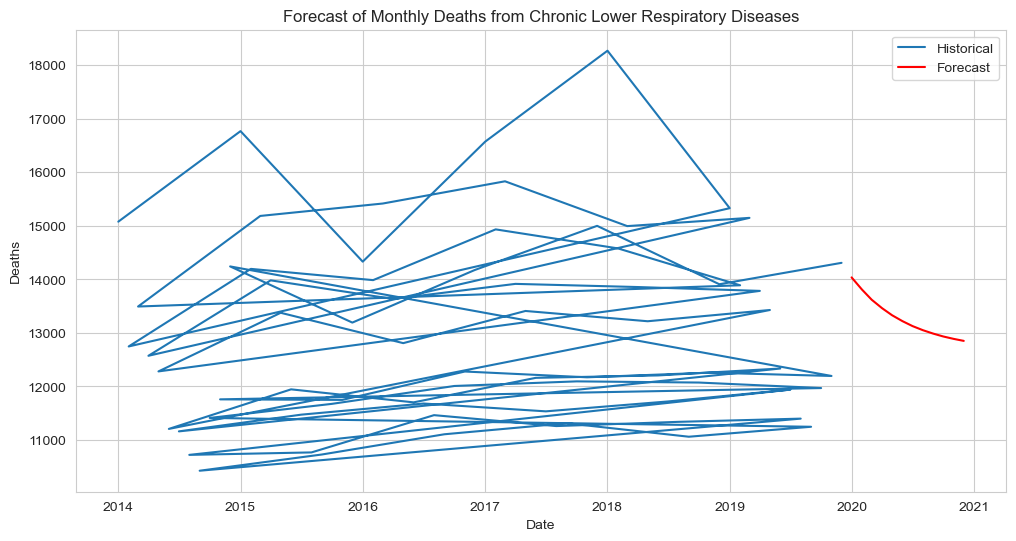

In [47]:
# Fit an ARIMA model to the (differenced) stationary data
model = ARIMA(respiratory_deaths, order=(1,1,1))  # Adjust the order based on ACF and PACF plots or iterative testing
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(respiratory_deaths.index, respiratory_deaths, label='Historical')
plt.plot(pd.date_range(respiratory_deaths.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title('Forecast of Monthly Deaths from Chronic Lower Respiratory Diseases')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()


### Results Overview:

### Coefficients:
- A positive AR(1) coefficient suggests a direct relationship with the previous month's value, indicating persistence in the data.
- The MA(1) coefficient is significantly negative, which could suggest overcorrection in the model to previous errors.
- AIC: Evaluating the AIC helps determine the model's efficacy relative to others by balancing fit and complexity.

#### Statistical Significance:

P-values help verify the impact of these lags and corrections in modeling the data accurately.

### Implications:

Understanding the trends in respiratory disease-related deaths can guide healthcare resource allocation, especially for conditions that may have seasonal exacerbations (like asthma or COPD flare-ups).
The model's ability to forecast based on past patterns allows health systems to prepare for expected increases in respiratory issues, optimizing patient outcomes.


### Random Forest and Gradient Boosting

In [53]:
from sklearn.model_selection import train_test_split  # Make sure this line is included
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
# Convert 'Month' and 'Year' to categorical variables that are usable in modeling
data['Month'] = data['Month'].astype(str)
data['Year'] = data['Year'].astype(str)



In [55]:
# One-hot encoding of categorical features
data_encoded = pd.get_dummies(data, columns=['Month', 'Year'])



In [56]:
# Assume 'All Cause' is the target variable
X = data_encoded.drop(['All Cause', 'Jurisdiction of Occurrence'], axis=1)  # Drop non-numeric and target column
y = data_encoded['All Cause']



In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [59]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
# Predictions from Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [61]:
# Predictions from Gradient Boosting model
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [62]:
print("Random Forest Model - MSE: ", rf_mse, ", R2: ", rf_r2)
print("Gradient Boosting Model - MSE: ", gb_mse, ", R2: ", gb_r2)

Random Forest Model - MSE:  45867101.797813386 , R2:  0.8707810379072274
Gradient Boosting Model - MSE:  36930485.73145214 , R2:  0.8959576941042371


------------------------------

The Random Forest and Gradient Boosting models were developed to predict future mortality rates based on historical data spanning from 2014 to 2019. The models were evaluated based on their Mean Squared Error (MSE) and R-squared (R²) values, which provide insights into their accuracy and explanatory power.

### Random Forest Model
- MSE (Mean Squared Error): The MSE for the Random Forest model is approximately 45,867,101.80. This value represents the average squared difference between the observed actual outcomes and the outcomes predicted by the model. The lower the MSE, the better the model’s accuracy. In the context of mortality rates, this MSE indicates that on average, the model's predictions deviate from the actual number of deaths by the square root of this value, which would be approximately 6,773 deaths.


- R² (R-squared): The R² for the Random Forest model is 0.8708, approximately 87.08%. This metric indicates that about 87.08% of the variance in the monthly death counts is explained by the model. An R² value closer to 100% is ideal and shows that the model explains most of the variability in the response variable around its mean.

#### Gradient Boosting Model
- MSE (Mean Squared Error): The MSE for the Gradient Boosting model is approximately 36,930,485.73. This result is lower than that of the Random Forest model, suggesting that the Gradient Boosting model has a higher predictive accuracy. The average prediction error in terms of the number of deaths is about 6,077, which is lower than that of the Random Forest model.


- R² (R-squared): The R² value is 0.8960, or 89.60%, indicating that the model explains approximately 89.60% of the variance in the death counts. This higher R² value compared to the Random Forest model suggests that the Gradient Boosting model fits the data better and provides a more accurate representation of how the input features predict the number of deaths.